In [17]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm #A tqdm progress bar shows you how much time has elapsed and the estimated time remaining for the iterable
import sklearn.metrics as skmetrics #For evaluation metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings                               
warnings.filterwarnings('ignore')

In [18]:
profit = pd.read_csv('./profit.csv')
profit

,Unnamed: 0,Profit
0,0,-1.134899
1,1,-0.727930
2,2,-2.002807
3,3,-0.958803
4,4,-1.656102
...,...,...
195,195,-0.179615
196,196,-1.013576
197,197,-2.148866
198,198,-2.054297


### Question 1

In [20]:
def evaluate_models_cv(dataset, p_values, d_values, q_values):
    result1 = []
    result2 = []
    result3 = []
    best_rmse, best_cfg = float("inf"), None
    best_rmse1, best_cfg1 = float("inf"), None
    best_rmse2, best_cfg2 = float("inf"), None
    best_rmse3, best_cfg3 = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                validation_size=3
                train_size=197-5*validation_size
                rmse=0
                test1, test2, test3 = [], [], []
                pred1, pred2, pred3 = [], [], []
                for k in range(0,5):
                    train, test = dataset[0:train_size+k*validation_size],dataset[train_size+k*validation_size:train_size+k*validation_size+3]
                    model = ARIMA(train, order=order) #each step: rolling one step forward to update the train se
                    model_fit = model.fit()
                    pred = model_fit.forecast(len(test))
                    rmse = rmse+np.sqrt(skmetrics.mean_squared_error(test, pred))
                    test1.append(test.iloc[0])
                    test2.append(test.iloc[1])
                    test3.append(test.iloc[2])
                    pred1.append(pred.iloc[0])
                    pred2.append(pred.iloc[1])
                    pred3.append(pred.iloc[2])
                rmse_avg=rmse/5
                rmse1 = np.sqrt(skmetrics.mean_squared_error(test1, pred1))
                rmse2 = np.sqrt(skmetrics.mean_squared_error(test2, pred2))
                rmse3 = np.sqrt(skmetrics.mean_squared_error(test3, pred3))
                
                if rmse_avg < best_rmse:
                    best_rmse, best_cfg = rmse_avg, order
                    print('Average 3: ARIMA%s RMSE=%.3f' % (order,rmse_avg))

                if rmse1 < best_rmse1:
                    best_rmse1, best_cfg1 = rmse1, order
                    print('Step1:  ARIMA%s RMSE=%.3f' % (order,rmse1))

                if rmse2 < best_rmse2:
                    best_rmse2, best_cfg2 = rmse2, order
                    print('Step2:  ARIMA%s RMSE=%.3f' % (order,rmse2))

                if rmse3 < best_rmse3:
                    best_rmse3, best_cfg3 = rmse3, order
                    print('Step3:  ARIMA%s RMSE=%.3f' % (order,rmse3))

    print('------------------------------------------------------')
    print('Step1: Best ARIMA%s RMSE=%.3f' % (best_cfg1, best_rmse1))
    print('Step2: Best ARIMA%s RMSE=%.3f' % (best_cfg2, best_rmse2))
    print('Step3: Best ARIMA%s RMSE=%.3f' % (best_cfg3, best_rmse3))
    print('Average 3: Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))
    #return result

In [21]:
p_values = range(0, 5)
d_values = range(0, 1) #set d=0 for ARMA(p,q) model
q_values = range(0, 5)
evaluate_models_cv(profit['Profit'], p_values, d_values, q_values)

Average 3: ARIMA(0, 0, 0) RMSE=0.793
Step1:  ARIMA(0, 0, 0) RMSE=0.854
Step2:  ARIMA(0, 0, 0) RMSE=0.699
Step3:  ARIMA(0, 0, 0) RMSE=0.923
Step3:  ARIMA(0, 0, 1) RMSE=0.918
Step3:  ARIMA(0, 0, 2) RMSE=0.915
Step3:  ARIMA(0, 0, 3) RMSE=0.790
Step3:  ARIMA(0, 0, 4) RMSE=0.735
------------------------------------------------------
Step1: Best ARIMA(0, 0, 0) RMSE=0.854
Step2: Best ARIMA(0, 0, 0) RMSE=0.699
Step3: Best ARIMA(0, 0, 4) RMSE=0.735
Average 3: Best ARIMA(0, 0, 0) RMSE=0.793


### Question 2

In [28]:
def evaluate_models_cv2(dataset, p_values, d_values, q_values):
    result1 = []
    result2 = []
    result3 = []
    best_rmse, best_cfg = float("inf"), None
    best_rmse1, best_cfg1 = float("inf"), None
    best_rmse2, best_cfg2 = float("inf"), None
    best_rmse3, best_cfg3 = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                validation_size=3
                train_size=197-5*validation_size
                rmse=0
                test1, test2, test3 = [], [], []
                pred1, pred2, pred3 = [], [], []
                for k in range(0,5):
                    # step 1
                    train_1, test_1 = dataset[0:train_size+k*validation_size],dataset[train_size+k*validation_size]
                    model1 = ARIMA(train_1, order=order) #each step: rolling one step forward to update the train se
                    model1_fit = model1.fit()
                    pred_1 = model1_fit.forecast(1)
                    test1.append(test_1)
                    pred1.append(pred_1)
                    
                    # step 2
                    train_2, test_2 = pd.concat([train_1,pred_1]), dataset[train_size+k*validation_size+1]
                    model2 = ARIMA(train_2, order=order) #each step: rolling one step forward to update the train se
                    model2_fit = model2.fit()
                    pred_2 = model2_fit.forecast(1)
                    test2.append(test_2)
                    pred2.append(pred_2)

                    # step 3
                    train_3, test_3 = pd.concat([train_2,pred_2]), dataset[train_size+k*validation_size+2]
                    model3 = ARIMA(train_3, order=order) #each step: rolling one step forward to update the train se
                    model3_fit = model3.fit()
                    pred_3 = model3_fit.forecast(1)
                    test3.append(test_3)
                    pred3.append(pred_3)

                    rmse = rmse+np.sqrt(skmetrics.mean_squared_error([test_1, test_2, test_3], [pred_1, pred_2, pred_3]))

                rmse_avg=rmse/5
                rmse1 = np.sqrt(skmetrics.mean_squared_error(test1, pred1))
                rmse2 = np.sqrt(skmetrics.mean_squared_error(test2, pred2))
                rmse3 = np.sqrt(skmetrics.mean_squared_error(test3, pred3))
                
                if rmse_avg < best_rmse:
                    best_rmse, best_cfg = rmse_avg, order
                    print('Average 3: ARIMA%s RMSE=%.3f' % (order,rmse_avg))

                if rmse1 < best_rmse1:
                    best_rmse1, best_cfg1 = rmse1, order
                    print('Step1:  ARIMA%s RMSE=%.3f' % (order,rmse1))

                if rmse2 < best_rmse2:
                    best_rmse2, best_cfg2 = rmse2, order
                    print('Step2:  ARIMA%s RMSE=%.3f' % (order,rmse2))

                if rmse3 < best_rmse3:
                    best_rmse3, best_cfg3 = rmse3, order
                    print('Step3:  ARIMA%s RMSE=%.3f' % (order,rmse3))

    print('------------------------------------------------------')
    print('Step1: Best ARIMA%s RMSE=%.3f' % (best_cfg1, best_rmse1))
    print('Step2: Best ARIMA%s RMSE=%.3f' % (best_cfg2, best_rmse2))
    print('Step3: Best ARIMA%s RMSE=%.3f' % (best_cfg3, best_rmse3))
    print('Average 3: Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))
    #return result

In [29]:
p_values = range(0, 5)
d_values = range(0, 1) #set d=0 for ARMA(p,q) model
q_values = range(0, 5)
evaluate_models_cv2(profit['Profit'], p_values, d_values, q_values)

Average 3: ARIMA(0, 0, 0) RMSE=0.793
Step1:  ARIMA(0, 0, 0) RMSE=0.854
Step2:  ARIMA(0, 0, 0) RMSE=0.699
Step3:  ARIMA(0, 0, 0) RMSE=0.923
Step3:  ARIMA(0, 0, 1) RMSE=0.918
Step3:  ARIMA(0, 0, 2) RMSE=0.915
Step3:  ARIMA(0, 0, 3) RMSE=0.790
Step3:  ARIMA(0, 0, 4) RMSE=0.735
------------------------------------------------------
Step1: Best ARIMA(0, 0, 0) RMSE=0.854
Step2: Best ARIMA(0, 0, 0) RMSE=0.699
Step3: Best ARIMA(0, 0, 4) RMSE=0.735
Average 3: Best ARIMA(0, 0, 0) RMSE=0.793


### Question 3

In [24]:
# method 1
data = profit['Profit']
train, test = data[0:197], data[197:200]
model = ARIMA(train, order=(0, 0, 0))
model_fit = model.fit()
prediction = model_fit.forecast(3)
rmse = np.sqrt(skmetrics.mean_squared_error(test, prediction))
rmse

2.3828444918210905

In [25]:
# method 2
data = profit['Profit']

# step 1
train1, test1 = data[0:197], data[197]
model1 = ARIMA(train1, order=(0, 0, 0))
model1_fit = model1.fit()
pred1 = model1_fit.forecast(1)

# step 2
train2, test2 = pd.concat([train1,pred1]), data[198]
model2 = ARIMA(train2, order=(0, 0, 0))
model2_fit = model2.fit()
pred2 = model2_fit.forecast(1)

# step 3
train3, test3 = pd.concat([train2,pred2]), data[199]
model3 = ARIMA(train3, order=(0, 0, 0))
model3_fit = model3.fit()
pred3 = model3_fit.forecast(1)

rmse = np.sqrt(skmetrics.mean_squared_error([test1, test2, test3], [pred1, pred2, pred3]))
rmse

2.3828444749108417

### Question 4

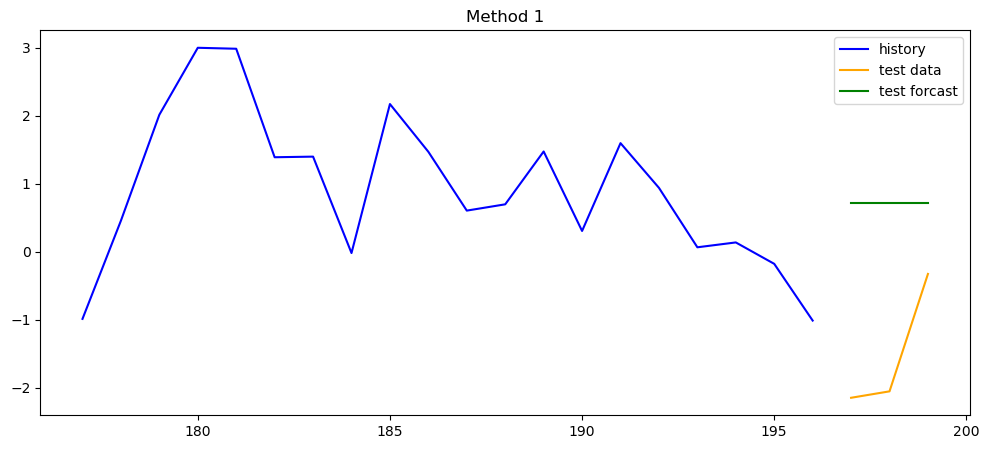

In [26]:
# method 1 
data = profit['Profit']
train, test = data[0:197], data[197:200]
model = ARIMA(train, order=(0, 0, 0))
model_fit = model.fit()
prediction = model_fit.forecast(3)

history = data[177:197]


pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(12,5))
history.plot(kind='line',y='x',color='blue', label='history', ax=ax)
test.plot(kind='line',y='x',color='orange', label='test data', ax=ax)
prediction.plot(kind='line',x='index',y='mean',color='green', label='test forcast', ax=ax)
plt.legend()
plt.title('Method 1')
plt.show()


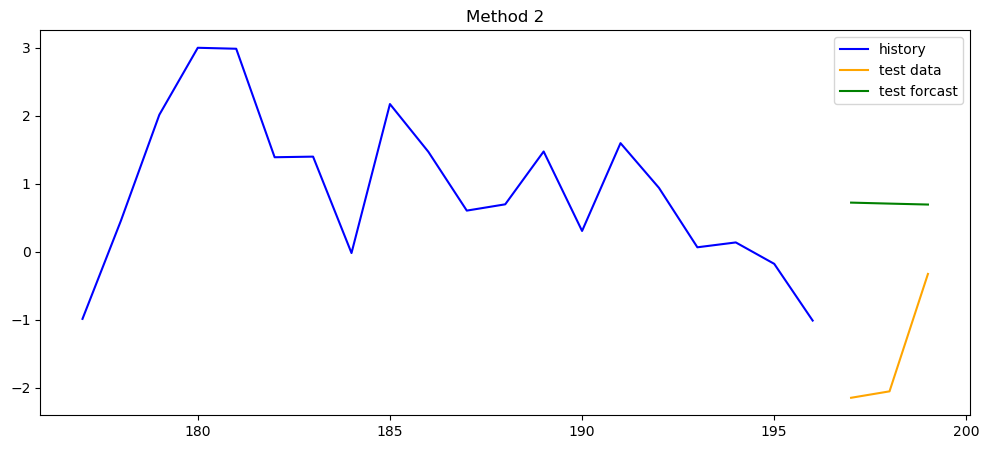

In [27]:
# method 2
data = profit['Profit']

# step 1
train1, test1 = data[0:197], data[197]
model1 = ARIMA(train1, order=(0, 0, 0))
model1_fit = model1.fit()
pred1 = model1_fit.forecast(1)

# step 2
train2, test2 = data[0:198], data[198]
model2 = ARIMA(train2, order=(0, 0, 0))
model2_fit = model2.fit()
pred2 = model2_fit.forecast(1)

# step 3
train3, test3 = data[0:199], data[199]
model3 = ARIMA(train3, order=(0, 0, 0))
model3_fit = model3.fit()
pred3 = model3_fit.forecast(1)

history = data[177:197]
test = data[197:200]
prediction = pd.concat([pred1, pred2, pred3])

pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(12,5))
history.plot(kind='line',y='x',color='blue', label='history', ax=ax)
test.plot(kind='line',y='x',color='orange', label='test data', ax=ax)
prediction.plot(kind='line',x='index',y='mean',color='green', label='test forcast', ax=ax)
plt.legend()
plt.title('Method 2')
plt.show()
